### Introduction

In this project, we are interested in analysing the bank's customer using demographic and financial information provided by the [Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?datasetId=797699&sortBy=voteCount) dataset to see if a custumer will leave the bank or not. 

So basicly by definition, churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service.

### Dataset Fields:
The dataset contains 10000 rows and 14 columns which will serve us to predict whether the customer will leave the bank or not.
Let's take a look at dataset fields:

    - 13 field corresponding the independant variables/features
    - 1 field corresponding to our dependant variable/target named "exited" in our database

| Column Name | Description |
| --- | --- |
| RowNumber | Row number |
| CustomerId | Unique identification key for different customers |
| Surname | Customer's last name |
| CreditScore | Credit score of the customer |
|Geography | Country of the customer |
|Age | Age of the customer |
|Tenure | Number of years for which the customer has been with the bank |
|Balance | Bank balance of the customer |
|NumOfProducts | Number of bank products the customer is utilising |
|HasCrCard | Binary flag for whether the customer holds a credit card with the bank or not |
|IsActiveMember | Binary flag for whether the customer is an active member with the bank or not |
|EstimatedSalary | Estimated salary of the customer in Dollars |
|Exited | Binary flag 1 if the customer closed account with bank and 0 if the customer is retained |



#### Importing librairies:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the data

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's rename our target variable "Exited" into a more suitable name like "Churn".
Just a reminder: 1 if the customer closed account with bank and 0 if the customer is retained


In [3]:
df.rename(columns={"Exited":"Churn"},inplace=True)

In [4]:
#Checking data-types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Data Pre-processing:

In [5]:
#descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


As a first step, let's remove unecessary columns like the RowNumber,CustomerId and Surname.

In [6]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


We need to check if there's any missing values or any duplicates.

In [8]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [9]:
df.duplicated().sum()

0

No missing values or duplicated values found.

### Explorative Data Analysis(EDA):

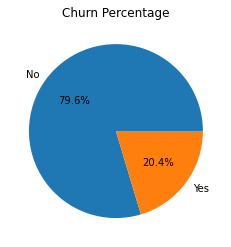

In [10]:
plt.pie(df.Churn.value_counts(),labels=["No","Yes"], autopct='%1.1f%%')
plt.title("Churn Percentage")
plt.show()

Most of the bank customers (79.6%) are faithful to the bank wheras 20.4% are closed their bank account and no longer uses the bank's services. We are interested in analysing the customer churn and trying to figure what kind of possible reasons are behind it.

#### Age:

Let's try and see if there's an indicator by analysing if there's a relationship between each feature and the target variable.

<AxesSubplot:xlabel='Age', ylabel='Count'>

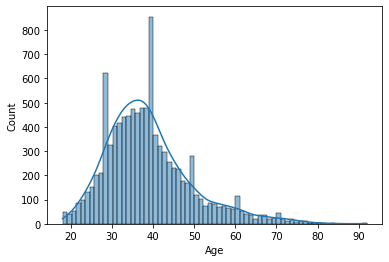

In [11]:
#histogram for age distribution
sns.histplot(data=df, x="Age",kde=True)

The age distribution is slightly skewed to the left where the majority of customers age are between 28 et 42.

<AxesSubplot:xlabel='Age', ylabel='Count'>

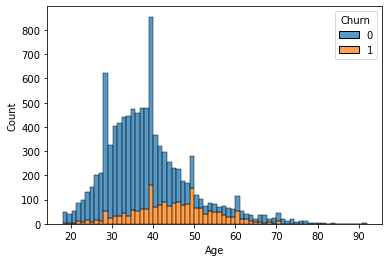

In [12]:
sns.histplot(data=df, x="Age",hue="Churn",multiple="stack")

The most customers who leave the bank are mostly between 40 et 50.

#### Gender

<AxesSubplot:xlabel='Gender', ylabel='Count'>

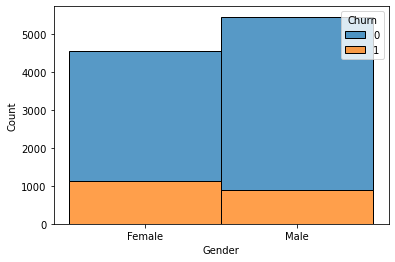

In [17]:
sns.histplot(data=df, x="Gender", hue="Churn",multiple="stack")

According to this plot, we have a higher male customer than female but the customer churn is very close for both gender so we cannot build a hypothesis upon this.